# Data Collection ()

- Data Source: There is only one data source a single csv file (LoanData.csv)

## Bronze Layer

The raw file will be the Bronze Layer according to the Medallion Architecture    

## Silver Layer

The column names are refactored, removing the special characters. We cleaned up the Date format in Date-Of_Birth, DisbursalDate

## Gold Layer


We calculated a Age column based on the date of birth, and also classified based on Age-Generation-Name also we converted CREDIT.HISTORY.LENGTH to months. This is final data that can be used for analysis

# Data Wrangling:

## Loading the data

In [61]:
import pandas as pd
import re
import seaborn as sb


In [2]:
url = '<data-url>'
df = pd.read_csv(url)
df

,disbursed_amount,asset_cost,ltv,branch_id,Date.of.Birth,Employment.Type,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,36439,65850,56.19,64,14-06-90,Self employed,28-09-18,1,1,0,0,0,0,0,0,0yrs 0mon,0,0
1,48749,69303,72.15,67,1/1/1991,Salaried,10/9/2018,1,1,0,0,0,0,783,0,2yrs 6mon,0,0
2,55348,66340,85.00,2,16-08-93,Self employed,31-08-18,1,1,0,0,0,0,0,0,0yrs 0mon,0,1
3,48849,64133,77.96,217,1/1/1989,Self employed,13-10-18,1,1,0,0,0,0,0,0,0yrs 0mon,0,0
4,40394,59386,70.72,74,31-12-74,Self employed,14-09-18,1,1,0,0,0,0,14,1,3yrs 1mon,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,123661,185371,69.59,34,14-12-82,Self employed,26-08-18,1,1,0,0,0,0,650,0,5yrs 10mon,1,0
23311,78879,122878,65.11,5,3/7/1993,Salaried,23-09-18,1,1,0,0,0,0,680,0,0yrs 9mon,0,0
23312,49349,67695,73.86,48,1/1/1994,Self employed,23-10-18,1,1,0,0,0,0,825,0,2yrs 3mon,0,0
23313,70897,84400,86.00,2,10/10/1982,Self employed,25-08-18,1,1,0,0,0,0,657,0,0yrs 6mon,2,0


#### Initial observations of data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23315 entries, 0 to 23314
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   disbursed_amount                     23315 non-null  int64  
 1   asset_cost                           23315 non-null  int64  
 2   ltv                                  23315 non-null  float64
 3   branch_id                            23315 non-null  int64  
 4   Date.of.Birth                        23315 non-null  object 
 5   Employment.Type                      22545 non-null  object 
 6   DisbursalDate                        23315 non-null  object 
 7   MobileNo_Avl_Flag                    23315 non-null  int64  
 8   Aadhar_flag                          23315 non-null  int64  
 9   PAN_flag                             23315 non-null  int64  
 10  VoterID_flag                         23315 non-null  int64  
 11  Driving_flag                

In [4]:
df.head(5)

,disbursed_amount,asset_cost,ltv,branch_id,Date.of.Birth,Employment.Type,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,36439,65850,56.19,64,14-06-90,Self employed,28-09-18,1,1,0,0,0,0,0,0,0yrs 0mon,0,0
1,48749,69303,72.15,67,1/1/1991,Salaried,10/9/2018,1,1,0,0,0,0,783,0,2yrs 6mon,0,0
2,55348,66340,85.00,2,16-08-93,Self employed,31-08-18,1,1,0,0,0,0,0,0,0yrs 0mon,0,1
3,48849,64133,77.96,217,1/1/1989,Self employed,13-10-18,1,1,0,0,0,0,0,0,0yrs 0mon,0,0
4,40394,59386,70.72,74,31-12-74,Self employed,14-09-18,1,1,0,0,0,0,14,1,3yrs 1mon,1,0


#### Get the columns of the dataframe

In [5]:
df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'MobileNo_Avl_Flag', 'Aadhar_flag',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'PERFORM_CNS.SCORE', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default'],
      dtype='object')

#### clean-up the column names remove all the dots inside the dataframe columns

In [6]:
df.columns = df.columns.str.replace('.', '_')

C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\2262415099.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '_')


In [7]:
df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'Date_of_Birth',
       'Employment_Type', 'DisbursalDate', 'MobileNo_Avl_Flag', 'Aadhar_flag',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'PERFORM_CNS_SCORE', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'loan_default'],
      dtype='object')

### Handling the duplicates

In [8]:
df.duplicated().sum()

0

#### There are no duplicates in this data, next we will check for nulls

### Handling the null values in the data

In [9]:
df.isnull().any()

disbursed_amount                       False
asset_cost                             False
ltv                                    False
branch_id                              False
Date_of_Birth                          False
Employment_Type                         True
DisbursalDate                          False
MobileNo_Avl_Flag                      False
Aadhar_flag                            False
PAN_flag                               False
VoterID_flag                           False
Driving_flag                           False
Passport_flag                          False
PERFORM_CNS_SCORE                      False
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS    False
CREDIT_HISTORY_LENGTH                  False
NO_OF_INQUIRIES                        False
loan_default                           False
dtype: bool

#### Employment_Type has nulls, also lets check if there are any na's

In [10]:
df.isna().any()

disbursed_amount                       False
asset_cost                             False
ltv                                    False
branch_id                              False
Date_of_Birth                          False
Employment_Type                         True
DisbursalDate                          False
MobileNo_Avl_Flag                      False
Aadhar_flag                            False
PAN_flag                               False
VoterID_flag                           False
Driving_flag                           False
Passport_flag                          False
PERFORM_CNS_SCORE                      False
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS    False
CREDIT_HISTORY_LENGTH                  False
NO_OF_INQUIRIES                        False
loan_default                           False
dtype: bool

#### here also we got the Employment_Type column only, lets check how many nulls and how many na's

In [11]:
df.isnull().sum()


disbursed_amount                         0
asset_cost                               0
ltv                                      0
branch_id                                0
Date_of_Birth                            0
Employment_Type                        770
DisbursalDate                            0
MobileNo_Avl_Flag                        0
Aadhar_flag                              0
PAN_flag                                 0
VoterID_flag                             0
Driving_flag                             0
Passport_flag                            0
PERFORM_CNS_SCORE                        0
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS      0
CREDIT_HISTORY_LENGTH                    0
NO_OF_INQUIRIES                          0
loan_default                             0
dtype: int64

In [12]:
df.isna().sum()


disbursed_amount                         0
asset_cost                               0
ltv                                      0
branch_id                                0
Date_of_Birth                            0
Employment_Type                        770
DisbursalDate                            0
MobileNo_Avl_Flag                        0
Aadhar_flag                              0
PAN_flag                                 0
VoterID_flag                             0
Driving_flag                             0
Passport_flag                            0
PERFORM_CNS_SCORE                        0
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS      0
CREDIT_HISTORY_LENGTH                    0
NO_OF_INQUIRIES                          0
loan_default                             0
dtype: int64

#### the above count infers that there are only null values (blank values)

#### Lets check the unique data in the employment_type column

In [13]:
df['Employment_Type'].value_counts()

Self employed    12724
Salaried          9821
Name: Employment_Type, dtype: int64

#### Employee_Type has two unique values and also the null vlaues, lets do further analysis

In [14]:
df['Employment_Type'].describe()

count             22545
unique                2
top       Self employed
freq              12724
Name: Employment_Type, dtype: object

#### The Self employed has the highest count, so lets replace the na with this value

In [15]:
df['Employment_Type'].fillna(df['Employment_Type'].mode()[0], inplace=True)

Let us recheck to see if still null exists

In [16]:
df.isna().any()

disbursed_amount                       False
asset_cost                             False
ltv                                    False
branch_id                              False
Date_of_Birth                          False
Employment_Type                        False
DisbursalDate                          False
MobileNo_Avl_Flag                      False
Aadhar_flag                            False
PAN_flag                               False
VoterID_flag                           False
Driving_flag                           False
Passport_flag                          False
PERFORM_CNS_SCORE                      False
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS    False
CREDIT_HISTORY_LENGTH                  False
NO_OF_INQUIRIES                        False
loan_default                           False
dtype: bool

We can see the null values are treated

### Cleaning up the data

Lets analyze the date columns

In [17]:
df["Date_of_Birth"].head(10)

0     14-06-90
1     1/1/1991
2     16-08-93
3     1/1/1989
4     31-12-74
5     23-11-64
6    1/10/1989
7     1/1/1995
8     15-06-94
9     23-11-82
Name: Date_of_Birth, dtype: object

#### The dates are of different type, and also python to_datetime() function is not giving proper data, so we will try to make the data consistent

In [18]:
# This will convert the date in format dd-mm-yy to dd-mm-19yy assuming the date of birth cannot be 18yy
def updateDate(dateStr):
    regexMatch = re.match('^(\d{2})\-(\d{2})\-(\d{2})$', str(dateStr))    
    if  (regexMatch is not None):
        # get the last seperator
        sepPos = dateStr.rfind('-')
        # get the year
        yearStr = dateStr[sepPos+1:]
        # get the string before year
        remainStr = dateStr[0:sepPos+1]
        # update the year
        if str(yearStr) == '00':
            yearStr = '20'+yearStr
            print(yearStr)
        else:
            yearStr = '19'+yearStr
        dateStr = remainStr+yearStr        
        return dateStr
    else:
        dateStr.replace('//','-')
        return dateStr

In [19]:
df['Date_of_Birth'] = df['Date_of_Birth'].apply(updateDate)

2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000


Recheck again to see if the function is applied correctly

In [20]:
df["Date_of_Birth"].head(10)

0    14-06-1990
1      1/1/1991
2    16-08-1993
3      1/1/1989
4    31-12-1974
5    23-11-1964
6     1/10/1989
7      1/1/1995
8    15-06-1994
9    23-11-1982
Name: Date_of_Birth, dtype: object

In [23]:
df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])

C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '14-06-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '16-08-1993' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '31-12-1974' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '23-11-1964' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'

C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '26-01-1989' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '16-03-1977' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '29-11-1983' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '30-11-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'

C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '18-12-1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '15-01-1963' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '16-08-1994' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '20-08-1977' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'

C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '19-02-1982' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '26-07-1972' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '16-08-1964' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '30-09-1980' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'

C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '13-04-1971' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '29-06-1978' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '18-08-1972' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '27-02-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'

C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '19-04-1964' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '15-02-1967' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '15-06-1971' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '16-06-1983' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'

C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '22-12-1988' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '24-08-1978' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '16-09-1995' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '25-05-1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'

C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '17-06-1975' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '26-11-1992' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '17-10-1994' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '18-04-1980' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'

C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '27-12-1988' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '23-09-1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '23-12-1983' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '30-08-1984' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'

C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '21-06-1998' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '23-10-1984' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '20-07-1991' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '26-05-1977' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'

C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '21-09-1972' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '17-08-1960' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '26-05-1974' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '23-12-1971' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'

C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '24-10-1996' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '24-02-1975' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '27-08-1965' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])
C:\Users\kiran\AppData\Local\Temp\ipykernel_23800\1938425758.py:1: UserWarning: Parsing '22-09-1993' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_of_Birth'

In [24]:
df["Date_of_Birth"].head(10)

0   1990-06-14
1   1991-01-01
2   1993-08-16
3   1989-01-01
4   1974-12-31
5   1964-11-23
6   1989-01-10
7   1995-01-01
8   1994-06-15
9   1982-11-23
Name: Date_of_Birth, dtype: datetime64[ns]

In [27]:
df['DisbursalDate'] = pd.to_datetime(df['DisbursalDate'])

In [28]:
df['DisbursalDate'].head(10)

0   2018-09-28
1   2018-10-09
2   2018-08-31
3   2018-10-13
4   2018-09-14
5   2018-08-17
6   2018-08-16
7   2018-08-26
8   2018-10-15
9   2018-10-26
Name: DisbursalDate, dtype: datetime64[ns]

#### Lets get the age at the time of loan DisbursalDate, and also categorise based on generation-name check https://en.wikipedia.org/wiki/Generation#List_of_social_generations

In [29]:
from datetime import datetime, date

def age(born):
    #born = datetime.strptime(born, "%d/%m/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))

def generationName(born):
    if born.year in range(1946, 1965):
        return "boomers"
    elif born.year in range(1965, 1981):
        return "genx"
    elif born.year in range(1981, 1997):
        return "millenials"
    elif born.year in range(1997, 2013):
        return "zoomers"
    
df['GenCategory'] = df['Date_of_Birth'].apply(generationName)
df['Age'] = df['Date_of_Birth'].apply(age)

In [30]:
df['Age'].head(10)

0    33
1    32
2    29
3    34
4    48
5    58
6    34
7    28
8    29
9    40
Name: Age, dtype: int64

In [31]:
df['GenCategory'].head(10)

0    millenials
1    millenials
2    millenials
3    millenials
4          genx
5       boomers
6    millenials
7    millenials
8    millenials
9    millenials
Name: GenCategory, dtype: object

Now we check Credit History column


In [64]:
df['CREDIT_HISTORY_LENGTH'].head(10)

0     0yrs 0mon
1     2yrs 6mon
2     0yrs 0mon
3     0yrs 0mon
4     3yrs 1mon
5    15yrs 2mon
6    1yrs 10mon
7     0yrs 0mon
8     0yrs 0mon
9    3yrs 10mon
Name: CREDIT_HISTORY_LENGTH, dtype: object

In [65]:
def convertToMonths(creditStr):
    yearsStr = creditStr.split(' ')[0]
    monthsStr = creditStr.split(' ')[1]
    yearsStr = yearsStr.replace('yrs','')
    monthsStr = monthsStr.replace('mon','')
    yearsInt = int(yearsStr) 
    monthsInt = int(monthsStr)
    return yearsInt*12+monthsInt

df['CREDIT_HISTORY_LENGTH'] = df['CREDIT_HISTORY_LENGTH'].apply(convertToMonths)


In [66]:
df['CREDIT_HISTORY_LENGTH'].head(10)

0      0
1     30
2      0
3      0
4     37
5    182
6     22
7      0
8      0
9     46
Name: CREDIT_HISTORY_LENGTH, dtype: int64

### Exploratory Data Analysis

In [32]:
df.describe()

,disbursed_amount,asset_cost,ltv,branch_id,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,loan_default,Age
count,23315.000000,23315.000000,23315.000000,23315.000000,23315.0,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000
mean,54297.647309,75842.182887,74.701607,72.079262,1.0,0.845078,0.075531,0.141068,0.023161,0.002059,291.234956,0.100622,0.205790,0.219858,38.684624
std,13061.877434,18988.525635,11.462722,69.095008,0.0,0.361838,0.264252,0.348099,0.150418,0.045328,338.490214,0.388782,0.699901,0.414159,9.828416
min,13369.000000,37230.000000,17.130000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
25%,46949.000000,65629.000000,68.830000,13.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000
50%,53759.000000,70929.000000,76.710000,61.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000
75%,60379.000000,79354.500000,83.630000,121.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,679.000000,0.000000,0.000000,0.000000,46.000000
max,592460.000000,715186.000000,94.980000,261.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,890.000000,7.000000,23.000000,1.000000,69.000000


0    18189
1     5126
Name: loan_default, dtype: int64


<AxesSubplot:>

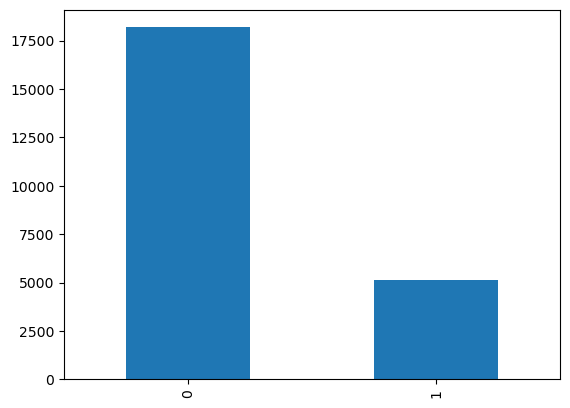

In [37]:
print(df.loan_default.value_counts())
df.loan_default.value_counts().plot.bar()
#plt.title('Default Count')

#### The number of non-defaulters are more compared to the number of defaulters, lets check how much percentage of defaulters

In [55]:
non_default_percentage = 100*df['loan_default'].tolist().count(0)/(df['loan_default'].tolist().count(0)+df['loan_default'].tolist().count(1))
non_default_percentage

78.01415397812568

In [56]:
default_percentage = 100*df['loan_default'].tolist().count(1)/(df['loan_default'].tolist().count(0)+df['loan_default'].tolist().count(1))
default_percentage

21.98584602187433

#### 78% are non-defaulters and around 22% are defaulters

#### Lets analyze with all he columns accross the defaul-column

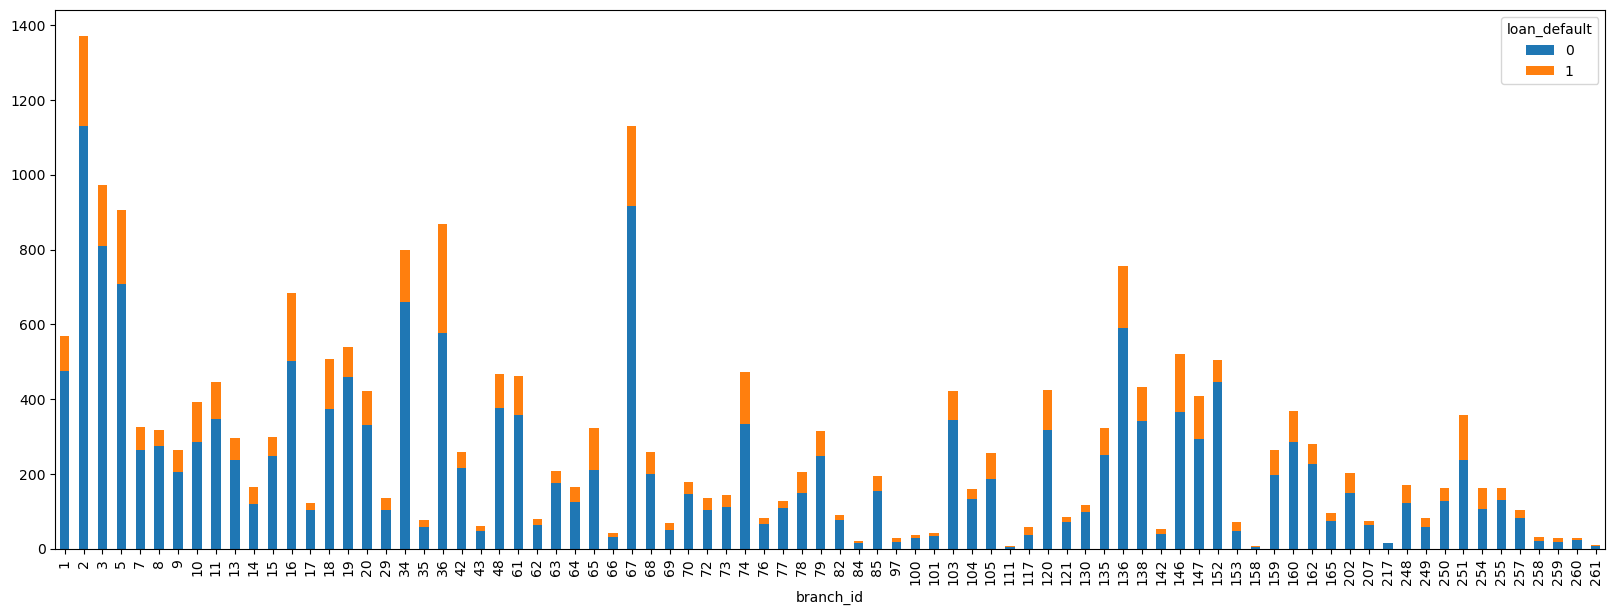

In [78]:
for i in ['branch_id']:
    ct = pd.crosstab(df[i], df['loan_default'])
    ct.plot.bar(stacked = True,figsize=(20,7))
    plt.legend(labels=['Not Defaulted','Defaulted'])
    #plt.show()
    

We can see that branch 2 has the hisghes defaulters

In [82]:
branch_wise_defaults = pd.crosstab(index=df['branch_id'], columns=df['loan_default'])
branch_wise_defaults['branch%'] = (branch_wise_defaults[1]/branch_wise_defaults.sum(axis=1))*100
#branch_wise_defaults
branch_wise_defaults

loan_default,0,1,branch%
branch_id,,,
1,476,92,16.197183
2,1131,241,17.565598
3,811,162,16.649538
5,709,198,21.830209
7,264,63,19.266055
...,...,...,...
257,83,21,20.192308
258,22,9,29.032258
259,19,9,32.142857


<AxesSubplot:xlabel='GenCategory', ylabel='count'>

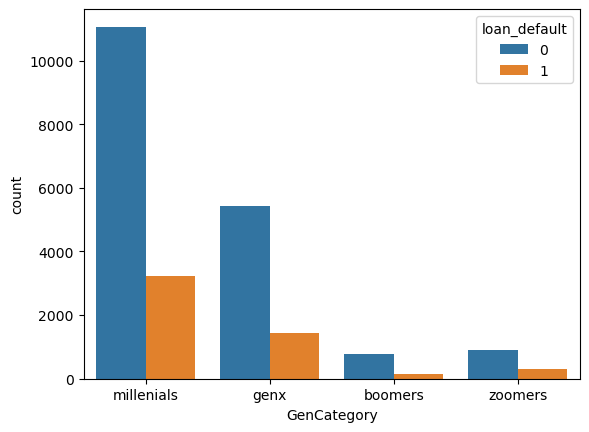

In [63]:
sb.countplot(x='GenCategory',hue='loan_default',data=df)

TypeError: 'Text' object is not callable

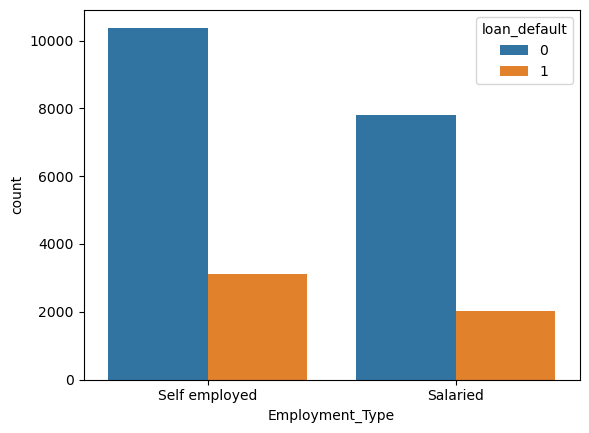

In [62]:
# Let's Bar Chart to draw the employment vs loan default chart
sb.countplot(x='Employment_Type',hue='loan_default',data=df)
#plt.title('Employment Bar Graph')

In [77]:
no_of_loan_inquiries = pd.crosstab(index=df['NO_OF_INQUIRIES'], columns=df['loan_default'])
no_of_loan_inquiries['default_%'] = (no_of_loan_inquiries[1]/no_of_loan_inquiries.sum(axis=1))*100
no_of_loan_inquiries

loan_default,0,1,default_%
NO_OF_INQUIRIES,,,
0,15865,4335,21.460396
1,1700,523,23.526766
2,394,155,28.233151
3,121,57,32.022472
4,51,17,25.000000
5,20,13,39.393939
6,12,6,33.333333
7,11,9,45.000000
8,3,6,66.666667


In [83]:
print(df['Aadhar_flag'].value_counts(normalize=True)*100)
print(df['PAN_flag'].value_counts(normalize=True)*100)
print(df['VoterID_flag'].value_counts(normalize=True)*100)
print(df['Driving_flag'].value_counts(normalize=True)*100)
print(df['Passport_flag'].value_counts(normalize=True)*100)

1    84.507828
0    15.492172
Name: Aadhar_flag, dtype: float64
0    92.446923
1     7.553077
Name: PAN_flag, dtype: float64
0    85.893202
1    14.106798
Name: VoterID_flag, dtype: float64
0    97.683894
1     2.316106
Name: Driving_flag, dtype: float64
0    99.794124
1     0.205876
Name: Passport_flag, dtype: float64


In [84]:
df['PERFORM_CNS_SCORE'].describe()

count    23315.000000
mean       291.234956
std        338.490214
min          0.000000
25%          0.000000
50%          0.000000
75%        679.000000
max        890.000000
Name: PERFORM_CNS_SCORE, dtype: float64

<AxesSubplot:ylabel='Frequency'>

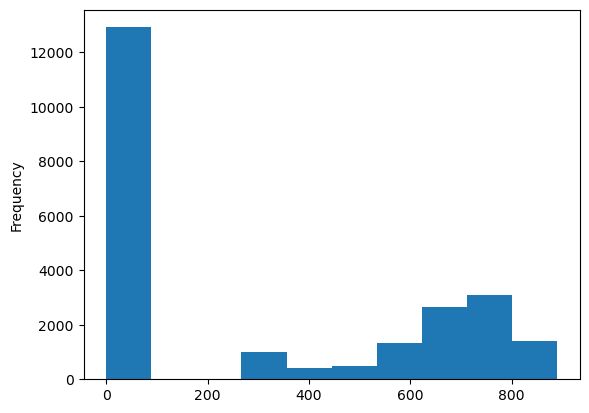

In [85]:
df['PERFORM_CNS_SCORE'].plot(kind='hist')

In [86]:
df.to_csv("<dest-url>",index=False)